### Task 1: Introduction to Isolation Forest
**Description**: Install the necessary library and load a sample dataset.

**Steps**:
1. Install scikit-learn
2. Load a sample dataset using Python

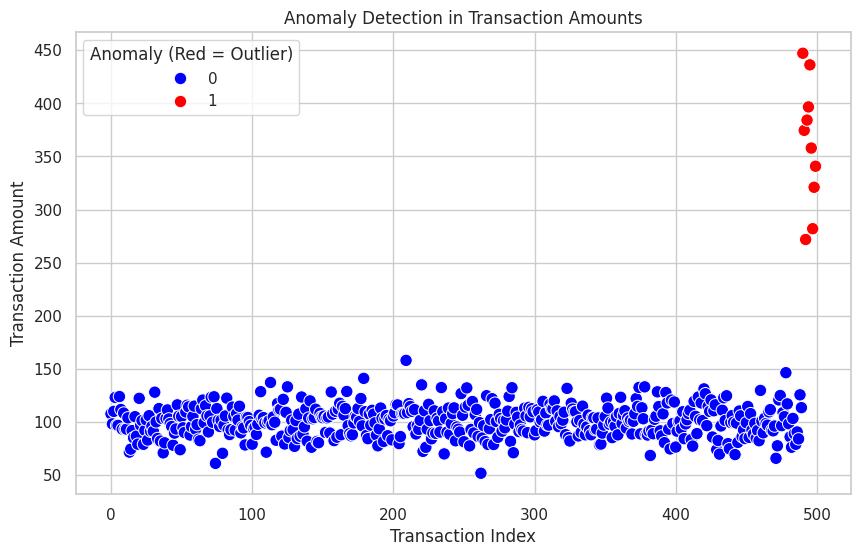

✅ Results saved to 'detected_anomalies.csv'


In [7]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

# For better visualizations
sns.set(style="whitegrid")

# Step 2: Generate Synthetic Transaction Data
def generate_transaction_data():
    np.random.seed(42)
    normal_data = np.random.normal(loc=100, scale=15, size=490)  # Normal transactions
    anomalies = np.random.uniform(low=250, high=500, size=10)     # Anomalies
    all_data = np.concatenate([normal_data, anomalies])
    df = pd.DataFrame({'TransactionAmount': all_data})
    return df

# Step 3: Apply Isolation Forest for Anomaly Detection
def detect_anomalies(df):
    model = IsolationForest(contamination=0.02, random_state=42)
    df['Anomaly'] = model.fit_predict(df[['TransactionAmount']])
    df['Anomaly'] = df['Anomaly'].map({1: 0, -1: 1})  # 0 = normal, 1 = anomaly
    return df

# Step 4: Visualize the Anomalies
def plot_anomalies(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=df.index,
        y='TransactionAmount',
        hue='Anomaly',
        data=df,
        palette={0: 'blue', 1: 'red'},
        s=80
    )
    plt.title("Anomaly Detection in Transaction Amounts")
    plt.xlabel("Transaction Index")
    plt.ylabel("Transaction Amount")
    plt.legend(title="Anomaly (Red = Outlier)")
    plt.show()

# Step 5: Save results to CSV with error handling
def save_results(df, filename="detected_anomalies.csv"):
    try:
        df.to_csv(filename, index=False)
        print(f"✅ Results saved to '{filename}'")
    except Exception as e:
        print(f"❌ Error saving file: {e}")

# Step 6: Main function to run the pipeline
def main():
    df = generate_transaction_data()
    df = detect_anomalies(df)
    plot_anomalies(df)
    save_results(df)

# Execute
main()


### Task 2: Building an Isolation Forest
**Description**: Initialize an Isolation Forest model and fit it to the Boston dataset.

**Steps**:
1. Initialize Isolation Forest
2. Fit model

In [8]:
# write your code from here

### Task 3: Detecting Anomalies
**Description**: Use the fitted Isolation Forest model to predict anomalies.

**Steps**:
1. Predict anomalies
2. Display anomaly counts

In [9]:
# write your code from here

### Task 4: Visualizing Anomalies
**Description**: Visualize the results to see which samples are considered anomalies.

**Steps**:
1. Plot a scatter plot

In [10]:
# write your code from here

### Task 5: Interpret Contamination Parameter
**Description**: Experiment with different contamination levels.

In [11]:
# write your code from here